In [1]:
import pandas as pd

train_dataset = pd.read_excel(r'C:/Users/kqb18171/OneDrive - University of Strathclyde/Crystal shape prediction chapter/Crystal_Shape_Classification.xlsx', sheet_name='2-class_train_ethanol')
test_dataset = pd.read_excel(r'C:/Users/kqb18171/OneDrive - University of Strathclyde/Crystal shape prediction chapter/Crystal_Shape_Classification.xlsx', sheet_name='2-class_test_ethanol')

# Training data

In [2]:
# Use numpy to convert to arrays
import numpy as np
# outcomes are the values we want to predict
train_outcomes = np.array(train_dataset['CrysShape'])
# Remove the outcomes from the parameters (data needed for making the prediction)
# axis 1 refers to the columns
train_features = train_dataset.drop(['Solvent name', 'SMILE', 'Conc_mg-mL', 'CrysShape'], axis = 1)
# Saving feature names for later use
train_features_list = list(train_features.columns)
# Convert to numpy array
train_features_list = np.array(train_features_list)

# Test data

In [3]:
# Use numpy to convert to arrays
import numpy as np
# outcomes are the values we want to predict
test_outcomes = np.array(test_dataset['CrysShape'])
# Remove the outcomes from the parameters (data needed for making the prediction)
# axis 1 refers to the columns
test_features = test_dataset.drop(['Solvent name', 'SMILE', 'Conc_mg-mL', 'CrysShape'], axis = 1)
# Saving feature names for later use
test_features_list = list(test_features.columns)
# Convert to numpy array
test_features_list = np.array(test_features_list)

# Model accuracy

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

x_train = train_features
y_train = train_outcomes
x_test = test_features
y_test = test_outcomes
         
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
    
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)   

Accuracy:  1.0


# Important score

In [5]:
#sort important scores of each parameters
#use only this code, no need to run the previous two sets of code
imp_score = pd.Series(clf.feature_importances_,index=train_features_list).sort_values(ascending=False)

In [6]:
#top 20 parameters with the largest values of important scores
top20_imp_score = imp_score[0:20]
print(top20_imp_score)

SS              0.210672
BCUT_PEOE_2     0.026021
rings           0.023940
opr_brigid      0.022206
logS            0.019652
GCUT_PEOE_1     0.017650
GCUT_PEOE_2     0.014474
chi1_C          0.014118
GCUT_SLOGP_3    0.013826
PEOE_VSA-5      0.013755
BCUT_PEOE_1     0.012809
BCUT_SMR_1      0.012582
h_log_pbo       0.012191
GCUT_SMR_0      0.011958
mr              0.011824
BCUT_SLOGP_1    0.011740
h_emd_C         0.011478
a_aro           0.010643
logP(o/w)       0.010203
BCUT_SMR_3      0.010097
dtype: float64


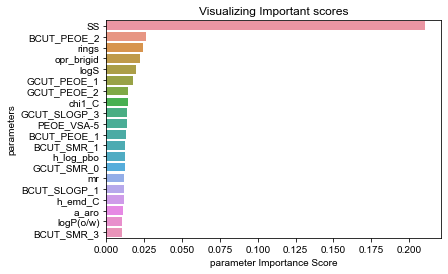

In [7]:
#plot important scores
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=top20_imp_score, y=top20_imp_score.index)
sns.set(rc={'figure.figsize':(8,6)})
plt.xlabel('parameter Importance Score')
plt.ylabel('parameters')
plt.title('Visualizing Important scores')
plt.show()

In [8]:
# Add column 'Prediction' to the dataframe
test_dataset['Prediction'] = y_pred

predicted_shape = test_dataset[['Solvent name', 'Sol_25c', 'SS','CrysShape', 'Prediction']]
predicted_shape

,Solvent name,Sol_25c,SS,CrysShape,Prediction
0,Ethanol,7.87,1.291381,Polyhedral,Polyhedral
1,Ethanol,7.87,1.382794,Polyhedral,Polyhedral
2,Ethanol,7.87,1.465403,Polyhedral,Polyhedral
3,Ethanol,7.87,1.524778,Polyhedral,Polyhedral
4,Ethanol,7.87,1.206298,Polyhedral,Polyhedral
5,Ethanol,7.87,1.607681,Polyhedral,Polyhedral
6,Ethanol,7.87,1.711298,Polyhedral,Polyhedral
7,Ethanol,7.87,1.813713,Polyhedral,Polyhedral
8,Ethanol,7.87,2.019420,Polyhedral,Polyhedral


# Feature selection

## Top-20

In [9]:
#train data
train_features_top20 = train_dataset[top20_imp_score.index]
# Saving feature names for later use
train_features_top20_list = list(train_features_top20.columns)
# Convert to numpy array
train_features_top20_list = np.array(train_features_top20_list)

#test data
test_features_top20 = test_dataset[top20_imp_score.index]
# Saving feature names for later use
test_features_top20_list = list(test_features_top20.columns)
# Convert to numpy array
test_features_top20_list = np.array(test_features_top20_list)

# Model accuracy
x_train = train_features_top20
y_train = train_outcomes
x_test = test_features_top20
y_test = test_outcomes
         
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
    
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)   

Accuracy:  1.0


In [10]:
#plot important scores

imp_score = pd.Series(clf.feature_importances_,index=train_features_top20_list).sort_values(ascending=False)
print(imp_score)

SS              0.205568
rings           0.068879
GCUT_PEOE_2     0.060893
PEOE_VSA-5      0.053590
h_emd_C         0.052465
GCUT_SMR_0      0.049911
opr_brigid      0.048392
BCUT_PEOE_2     0.047906
h_log_pbo       0.046133
logP(o/w)       0.045269
logS            0.043861
GCUT_SLOGP_3    0.041662
BCUT_PEOE_1     0.037871
mr              0.037449
BCUT_SMR_3      0.033968
BCUT_SMR_1      0.032616
GCUT_PEOE_1     0.031960
BCUT_SLOGP_1    0.026192
chi1_C          0.022524
a_aro           0.012890
dtype: float64


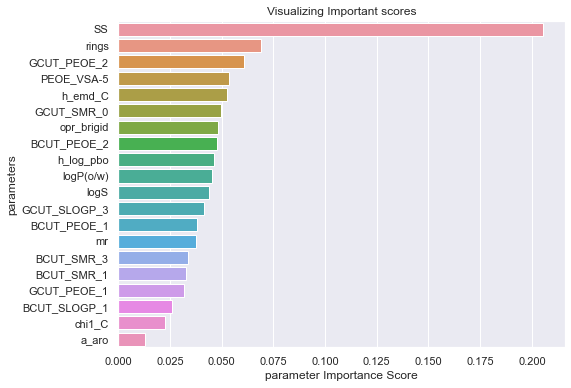

In [11]:
sns.barplot(x=imp_score, y=imp_score.index)
sns.set(rc={'figure.figsize':(8,6)})
plt.xlabel('parameter Importance Score')
plt.ylabel('parameters')
plt.title('Visualizing Important scores')
plt.show()

In [12]:
# Add column 'Prediction' to the dataframe
test_dataset['Prediction'] = y_pred

predicted_shape = test_dataset[['Solvent name', 'Sol_25c', 'SS','CrysShape', 'Prediction']]
predicted_shape

,Solvent name,Sol_25c,SS,CrysShape,Prediction
0,Ethanol,7.87,1.291381,Polyhedral,Polyhedral
1,Ethanol,7.87,1.382794,Polyhedral,Polyhedral
2,Ethanol,7.87,1.465403,Polyhedral,Polyhedral
3,Ethanol,7.87,1.524778,Polyhedral,Polyhedral
4,Ethanol,7.87,1.206298,Polyhedral,Polyhedral
5,Ethanol,7.87,1.607681,Polyhedral,Polyhedral
6,Ethanol,7.87,1.711298,Polyhedral,Polyhedral
7,Ethanol,7.87,1.813713,Polyhedral,Polyhedral
8,Ethanol,7.87,2.019420,Polyhedral,Polyhedral


## Atom counts and bond counts + Pharmacophore features

In [13]:
#train data
train_features_structure = train_dataset[['a_aro', 'a_count', 'a_heavy', 'a_nH', 'a_nC', 'a_nN', 'a_nO', 'a_nS', 'a_nCl', 'a_nBr',
                          'a_nI', 'b_ar', 'b_count', 'b_double', 'b_heavy', 'b_rotN', 'b_single', 'b_triple', 'chiral',
                          'opr_brigid', 'rings', 'a_acc', 'a_don', 'a_acid', 'a_base', 'a_hyd', 'SS']]

# Saving feature names for later use
train_features_structure_list = list(train_features_structure.columns)
# Convert to numpy array
train_features_structure_list = np.array(train_features_structure_list)

#test data
test_features_structure = test_dataset[['a_aro', 'a_count', 'a_heavy', 'a_nH', 'a_nC', 'a_nN', 'a_nO', 'a_nS', 'a_nCl', 'a_nBr',
                          'a_nI', 'b_ar', 'b_count', 'b_double', 'b_heavy', 'b_rotN', 'b_single', 'b_triple', 'chiral',
                          'opr_brigid', 'rings', 'a_acc', 'a_don', 'a_acid', 'a_base', 'a_hyd', 'SS']]

# Saving feature names for later use
test_features_structure_list = list(test_features_structure.columns)
# Convert to numpy array
test_features_structure_list = np.array(test_features_structure_list)

# Model accuracy
x_train = train_features_structure
y_train = train_outcomes
x_test = test_features_structure
y_test = test_outcomes
         
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
    
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)   

Accuracy:  1.0


In [14]:
#plot important scores

imp_score = pd.Series(clf.feature_importances_,index=train_features_structure_list).sort_values(ascending=False)
print(imp_score)

SS            0.215387
opr_brigid    0.083831
b_single      0.070896
a_nH          0.062645
rings         0.060186
a_count       0.059731
b_count       0.058946
a_nO          0.040516
a_hyd         0.037675
a_nBr         0.034550
b_heavy       0.033952
a_nC          0.033274
b_ar          0.033013
a_aro         0.032572
a_heavy       0.028862
b_rotN        0.027813
a_nCl         0.021545
a_acc         0.020838
a_nN          0.015390
b_double      0.011484
a_don         0.009245
a_nS          0.002725
b_triple      0.002659
chiral        0.001802
a_nI          0.000463
a_acid        0.000000
a_base        0.000000
dtype: float64


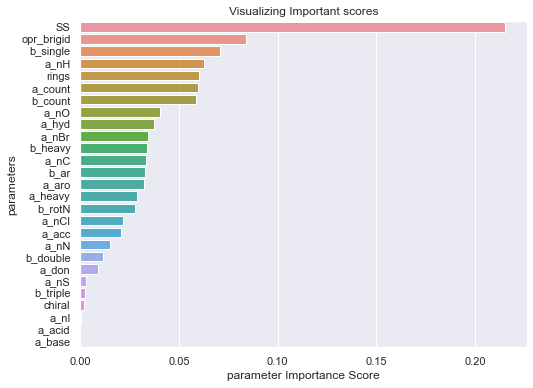

In [15]:
sns.barplot(x=imp_score, y=imp_score.index)
sns.set(rc={'figure.figsize':(8,6)})
plt.xlabel('parameter Importance Score')
plt.ylabel('parameters')
plt.title('Visualizing Important scores')
plt.show()

In [16]:
# Add column 'Prediction' to the dataframe
test_dataset['Prediction'] = y_pred

In [17]:
predicted_shape = test_dataset[['Solvent name', 'Sol_25c', 'SS','CrysShape', 'Prediction']]
predicted_shape

,Solvent name,Sol_25c,SS,CrysShape,Prediction
0,Ethanol,7.87,1.291381,Polyhedral,Polyhedral
1,Ethanol,7.87,1.382794,Polyhedral,Polyhedral
2,Ethanol,7.87,1.465403,Polyhedral,Polyhedral
3,Ethanol,7.87,1.524778,Polyhedral,Polyhedral
4,Ethanol,7.87,1.206298,Polyhedral,Polyhedral
5,Ethanol,7.87,1.607681,Polyhedral,Polyhedral
6,Ethanol,7.87,1.711298,Polyhedral,Polyhedral
7,Ethanol,7.87,1.813713,Polyhedral,Polyhedral
8,Ethanol,7.87,2.019420,Polyhedral,Polyhedral


## Physical properties

In [18]:
# train data
train_features_prop = train_dataset[['apol', 'bpol', 'density', 'mr', 'SMR', 'Weight', 'logP(o/w)', 'logS', 'reactive',
                          'SlogP', 'TPSA', 'vdw_vol', 'vdw_area', 'SS']]
# Saving feature names for later use
train_features_prop_list = list(train_features_prop.columns)
# Convert to numpy array
train_features_prop_list = np.array(train_features_prop_list)

# test data
test_features_prop = test_dataset[['apol', 'bpol', 'density', 'mr', 'SMR', 'Weight', 'logP(o/w)', 'logS', 'reactive',
                          'SlogP', 'TPSA', 'vdw_vol', 'vdw_area', 'SS']]
# Saving feature names for later use
test_features_prop_list = list(test_features_prop.columns)
# Convert to numpy array
test_features_prop_list = np.array(test_features_prop_list)

# Model accuracy
x_train = train_features_prop
y_train = train_outcomes
x_test = test_features_prop
y_test = test_outcomes
         
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
    
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)   

Accuracy:  1.0


In [19]:
#plot important scores

imp_score = pd.Series(clf.feature_importances_,index=train_features_prop_list).sort_values(ascending=False)
print(imp_score)

SS           0.204504
logS         0.098762
mr           0.087267
vdw_vol      0.084921
bpol         0.081869
vdw_area     0.073031
logP(o/w)    0.069992
SlogP        0.063221
SMR          0.061954
apol         0.054201
Weight       0.044458
density      0.041837
TPSA         0.029491
reactive     0.004493
dtype: float64


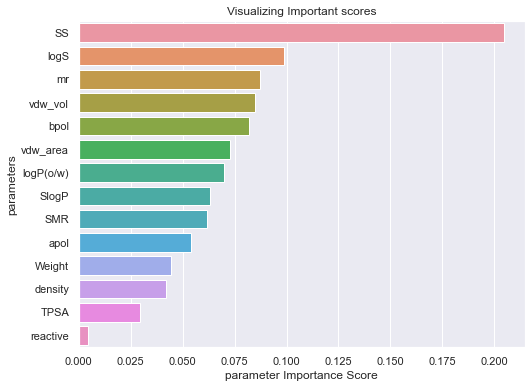

In [20]:
sns.barplot(x=imp_score, y=imp_score.index)
sns.set(rc={'figure.figsize':(8,6)})
plt.xlabel('parameter Importance Score')
plt.ylabel('parameters')
plt.title('Visualizing Important scores')
plt.show()

In [21]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[9]]


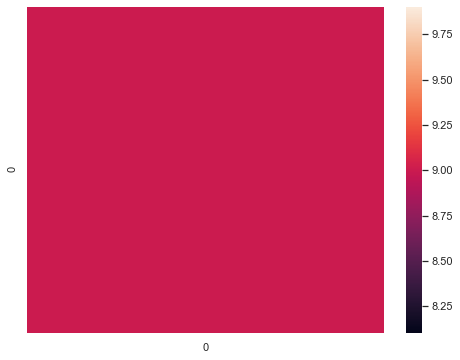

In [22]:
# Visualize it as a heatmap
import seaborn
seaborn.heatmap(conf_mat)
plt.show()

In [23]:
#precision and recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Polyhedral       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



In [24]:
# Add column 'Prediction' to the dataframe
test_dataset['Prediction'] = y_pred

In [25]:
predicted_shape = test_dataset[['Solvent name', 'Sol_25c', 'SS','CrysShape', 'Prediction']]
predicted_shape

,Solvent name,Sol_25c,SS,CrysShape,Prediction
0,Ethanol,7.87,1.291381,Polyhedral,Polyhedral
1,Ethanol,7.87,1.382794,Polyhedral,Polyhedral
2,Ethanol,7.87,1.465403,Polyhedral,Polyhedral
3,Ethanol,7.87,1.524778,Polyhedral,Polyhedral
4,Ethanol,7.87,1.206298,Polyhedral,Polyhedral
5,Ethanol,7.87,1.607681,Polyhedral,Polyhedral
6,Ethanol,7.87,1.711298,Polyhedral,Polyhedral
7,Ethanol,7.87,1.813713,Polyhedral,Polyhedral
8,Ethanol,7.87,2.019420,Polyhedral,Polyhedral
